In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

In [46]:
Input=torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Target=torch.tensor([0, 1, 1, 0], dtype=torch.long)

In [47]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.Input_Layer = nn.Linear(2, 4)
        self.Hidden_Layer= nn.Linear(4,6)
        self.Output_Layer = nn.Linear(6, 2)

    def forward(self, x):
        First_out = torch.sigmoid(self.Input_Layer(x))
        Hidden_out=torch.sigmoid(self.Hidden_Layer(First_out))
        Output = self.Output_Layer(Hidden_out)
        return Output

In [48]:
model = XOR()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [51]:
Test=torch.tensor([[0, 1], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
TestTarget=torch.tensor([1, 1, 1, 0], dtype=torch.long)

In [52]:
train_loss=[]
test_loss=[]
for i in range(500):
    optimizer.zero_grad()
    outputs = model(Input)
    loss = criterion(torch.log_softmax(outputs, dim=1), Target)
    loss.backward()
    optimizer.step()
    print('epoch :',i,'loss:',loss.item())
    with torch.no_grad():
        model.eval()
        y_pred=model(Test)
        test=criterion(y_pred,TestTarget)
    train_loss.append(float(loss.data))
    test_loss.append(float(test.data))

epoch : 0 loss: 0.7094622254371643
epoch : 1 loss: 0.7055537700653076
epoch : 2 loss: 0.702580988407135
epoch : 3 loss: 0.7003230452537537
epoch : 4 loss: 0.6986099481582642
epoch : 5 loss: 0.6973112225532532
epoch : 6 loss: 0.6963271498680115
epoch : 7 loss: 0.69558185338974
epoch : 8 loss: 0.6950174570083618
epoch : 9 loss: 0.6945903301239014
epoch : 10 loss: 0.6942670345306396
epoch : 11 loss: 0.6940223574638367
epoch : 12 loss: 0.6938371062278748
epoch : 13 loss: 0.6936969757080078
epoch : 14 loss: 0.6935908198356628
epoch : 15 loss: 0.6935105919837952
epoch : 16 loss: 0.693449854850769
epoch : 17 loss: 0.6934037804603577
epoch : 18 loss: 0.6933689713478088
epoch : 19 loss: 0.6933426856994629
epoch : 20 loss: 0.6933226585388184
epoch : 21 loss: 0.6933075189590454
epoch : 22 loss: 0.6932960748672485
epoch : 23 loss: 0.6932873725891113
epoch : 24 loss: 0.693280816078186
epoch : 25 loss: 0.6932758092880249
epoch : 26 loss: 0.693272054195404
epoch : 27 loss: 0.6932691335678101
epoch : 

epoch : 237 loss: 0.6932494044303894
epoch : 238 loss: 0.6932493448257446
epoch : 239 loss: 0.6932492852210999
epoch : 240 loss: 0.6932492256164551
epoch : 241 loss: 0.6932491660118103
epoch : 242 loss: 0.6932491064071655
epoch : 243 loss: 0.6932491064071655
epoch : 244 loss: 0.693248987197876
epoch : 245 loss: 0.693248987197876
epoch : 246 loss: 0.693248987197876
epoch : 247 loss: 0.6932489275932312
epoch : 248 loss: 0.6932488679885864
epoch : 249 loss: 0.6932488679885864
epoch : 250 loss: 0.6932487487792969
epoch : 251 loss: 0.6932486891746521
epoch : 252 loss: 0.6932486891746521
epoch : 253 loss: 0.6932486295700073
epoch : 254 loss: 0.6932485699653625
epoch : 255 loss: 0.6932485103607178
epoch : 256 loss: 0.693248450756073
epoch : 257 loss: 0.6932483911514282
epoch : 258 loss: 0.6932483911514282
epoch : 259 loss: 0.6932482719421387
epoch : 260 loss: 0.6932482719421387
epoch : 261 loss: 0.6932482123374939
epoch : 262 loss: 0.6932481527328491
epoch : 263 loss: 0.6932481527328491
epoch

epoch : 480 loss: 0.6932382583618164
epoch : 481 loss: 0.6932381987571716
epoch : 482 loss: 0.6932381391525269
epoch : 483 loss: 0.6932381391525269
epoch : 484 loss: 0.6932381391525269
epoch : 485 loss: 0.6932380199432373
epoch : 486 loss: 0.6932380199432373
epoch : 487 loss: 0.6932379603385925
epoch : 488 loss: 0.6932379007339478
epoch : 489 loss: 0.6932379007339478
epoch : 490 loss: 0.693237841129303
epoch : 491 loss: 0.693237841129303
epoch : 492 loss: 0.6932377815246582
epoch : 493 loss: 0.6932376623153687
epoch : 494 loss: 0.6932376623153687
epoch : 495 loss: 0.6932375431060791
epoch : 496 loss: 0.6932376027107239
epoch : 497 loss: 0.6932375431060791
epoch : 498 loss: 0.6932374835014343
epoch : 499 loss: 0.6932374238967896


In [43]:
with torch.no_grad():
    test=model(Input)
    prd=torch.max(test,dim=1)

In [44]:
prd

torch.return_types.max(
values=tensor([-0.0885, -0.0721, -0.0913, -0.0771]),
indices=tensor([1, 1, 0, 0]))

In [54]:
import matplotlib.pyplot as plt

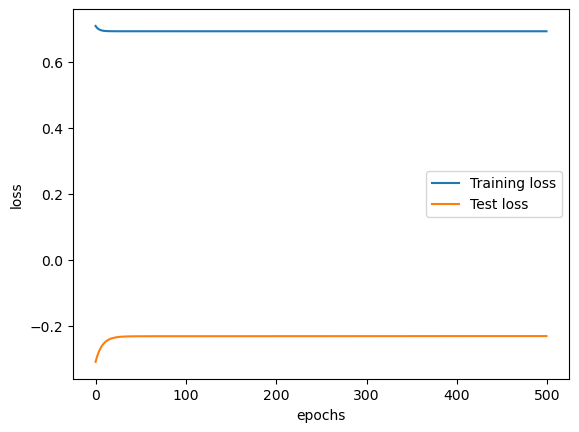

In [55]:
plt.plot(train_loss,label="Training loss")
plt.plot(test_loss,label="Test loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()